In [33]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Считка выборки из txt файла
sample = np.loadtxt("sample.txt", delimiter=',', dtype=np.int)

<ipython-input-34-070d81268faa>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample = np.loadtxt("sample.txt", delimiter=',', dtype=np.int)


In [35]:
global Z
Z = 1.96 # z-фактор 95% доверительного интервала

def mean_value(data):
    """
    Возвращает среднее значение по выборке.
    """
    return np.mean(data)

def standard_deviation(data):
    """
    Возвращает стандартное отклонение выборки.
    """
    return np.std(data, ddof=1)

def SEM(data):
    """
    Возвращает стандартную ошибку среднего.
    """
    return standard_deviation(data) / np.sqrt(len(data))

def lower_bound(data):
    """
    Нижняя граница доверительного интервала.
    """
    return mean_value(data) - Z * SEM(data)

def upper_bound(data):
    """
    Верхняя граница доверительного интервала.
    """
    return mean_value(data) + Z * SEM(data)

C:\Tools\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)

____________________________________________________
Среднее значение по выборке равно - 99.446
Стандартное отклонение выборки равно (SD) - 6.280
Стандартная ошибка среднего равна (SEM) - 0.779
Нижняя граница интервала равна - 97.919
Верхняя граница интервала равна - 100.973
____________________________________________________


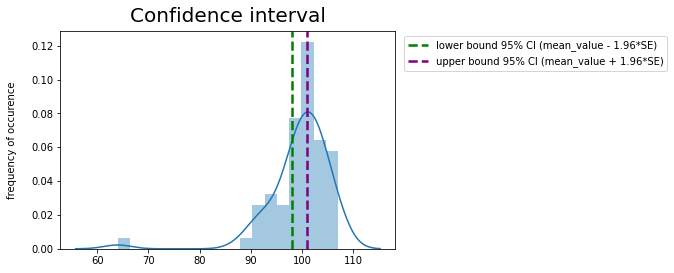

In [50]:
# отрисовка гистограммы
sns.distplot(sample, hist=True)
plt.title("Confidence interval", y=1.015, fontsize=20)
plt.axvline(x=lower_bound(sample), linestyle='--', linewidth=2.5, label="lower bound 95% CI (mean_value - 1.96*SE)", c='g')
plt.axvline(x=upper_bound(sample), linestyle='--', linewidth=2.5, label="upper bound 95% CI (mean_value + 1.96*SE)", c='purple')
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");

# принты
print('\n____________________________________________________')
print('Среднее значение по выборке равно - {:.3f}'.format(mean_value(sample)))
print('Стандартное отклонение выборки равно (SD) - {:.3f}'.format(standard_deviation(sample)))
print('Стандартная ошибка среднего равна (SEM) - {:.3f}'.format(SEM(sample)))
print('Нижняя граница интервала равна - {:.3f}\nВерхняя граница интервала равна - {:.3f}'.format(lower_bound(sample), upper_bound(sample)))
print('____________________________________________________')
